# 01. Introduction to urban spatial data and methods

In this introductory class, we will start our journey in urban data science by looking into:

* what urban spatial data represent
* how spatial data are classified
* how spatial data are stored
* how to install the main geospatial Python libraries
* common applications
* the overall course structure and content
* geographic projections
* coordinate reference systems
* how to access spatial data
* where to find spatial data

The main objective of this first class is to build up an overall basic spatial literacy and familiarity with the world of spatial data and urban analytics.

**(Geo)spatial data** is information that represents objects, events or other attributes with a location on the surface of the earth. Geospatial data usually combines information about the location (typically coordinates on the earth) and information about attributes of the object - quantitative or qualitative characteristics of the object, with temporal information (the time evolution of the location and attributes of the object concerned). The location provided may be _static_ in the short term (for example, the location of a building or an earthquake) or _dynamic_ (for example, a moving vehicle or pedestrian, the spread of an infectious disease).

Geospatial data typically involves large sets of spatial data collected from many different sources in varying formats and can include information such as census data, satellite imagery, vehicle GPS data, weather data, mobile phone data, social media data, etc. Geospatial data is most useful when it can be collected, stored, shared, analyzed and used in combination with traditional data.

A basic map with its most fundamental best practice attributes: 

* Map title
* good colour choice for visual and conceptual clarity
* Visual hierarchy of mapped objects
* Scale bar 
* Legend
* Signature

![title](images/MapOfMassachusetts.jpg)

An example of cluttered vs. hierarchically clear spatial data visualisation or mapping:

![title](images/LabelingAMap_After.jpg)

## Spatial data types

Spatial data are typically classified into the following types:

* **Vector data**
* **Raster data**
* **Point cloud data** (less common, but quickly gaining popularity)

**Vector** data uses geometric line segments to encode the data. Small enough straight line segments can define any desired curve. For each point comprising the line segments, both an *x* and a *y* coordinate must be stored in the specified vector format. Each line consists of a series of points, as well as some information about what the line represents.

A **point** is a **line** that consists of a single coordinate pair, while a **polygon** is a line that closes on itself to enclose a region.

* **Point** data might be vehicle GPS or point-of-interest location data. A point can be thought of as a degenerate line with only a single pair of coordinates.
* **Line** data might be streets, rivers, or GPS trajectories.
* **Polygon** data might be cities, countries, buildings, or lakes. It is a line that closes on itself and encloses a region.

Storing vector data as points, lines, or polygons depends on **scale**. At small scale, it is convenient and sensible to store a city as a point, but at large scale it would need to be stored as a polygon.

Vector data formats offer variable storage, indexing, and easily allow to enrich the data with attributes in tabular form. 
Common data formats include

* shapefile (.shp)
* geojson (.geojson)
* GeoPackage (.gpk)

Vector data is generally only 2D, but the shapefile format can have point elevations as an attribute in the database.

![title](images/Yerevan_pop_density_streets_pres.jpg)

**Raster** data uses a regular grid of points to represent the data. Conceptually similar to a pixelated image. Since the grid is regular, the x and y coordinates **do not** need to be stored for every single point, as was the case with vector data. Instead, we can store the the corner coordinates and grid spacing, which will define the *x* and *y* coordinates for every point in the grid. This way, the coordinates of each point can be calculated as needed rather than stored (computer computation may be cheaper than storage and file access). Each point just stores the value at that location, although it can point to a look up table with an explanation of the encoding scheme. Finer and finer grids lead to better resolution at the cost of increased storage, which goes up as the square of the improved resolution.

Key characteristics: 

* Regular grid
* fast access
* efficient storage.

Some raster data (like elevations in DEMs - [digital elevation models](https://en.wikipedia.org/wiki/Digital_elevation_model#:~:text=A%20digital%20elevation%20model%20(DEM,planet%2C%20moon%2C%20or%20asteroid.&text=DEMs%20are%20used%20often%20in,for%20digitally%20produced%20relief%20maps.)) can interpolate values between the grid values, while others (like land cover grids) cannot. 

Rasters are a 2.5D grid that can be thought of as a single valued function, *z = f(x,y)*.

![title](images/raster_data.jpg)

## Software packages

The most popular Geographic Information System (GIS) packages are [ArcGIS](https://www.arcgis.com/index.html), and, especially its open-source counterpart, [QGIS](https://www.qgis.org/en/site/). I recommend to download, install, and use it for quick exploration of geographic data, as geographic data, visual in nature, calls for interactive engagement with an intuitive GUI. Unless you know the dataset at hand, I recommend using QGIS for a first contact with the data, to explore its spatial properties, attributes, and overall nature to build an intuitive understanding of the kind of data you are going to work with.

![title](images/qgis.JPG)

## Geospatial Python libraries installation

Since the Python libraries used in this course constantly release new updates, some of the code will inevitably become outdated. Therefore, in order for the code to run consistently on your system, we will stick to `Python 3.8.5` and have the following package versions installed:

* numpy==1.19.5 (for example, you can go to your command prompt and do `pip install numpy==1.19.5`)
* pandas==1.1.2
* matplotlib==3.3.2
* geopandas==0.9.0
* osmnx==1.1.1
* descartes==1.1.0
* shapely==1.7.1
* contextily==1.1.0
* pysal==2.4.0
* rasterio==1.2.0

The crucial Python library this course is build on, is [GeoPandas](https://geopandas.org/getting_started.html) - an open source project extending Pandas functionality to add support for geographic data.

![title](images/gdf.PNG)

The installation guide on its [website](https://geopandas.org/getting_started.html) claims a routine installation procedure via Conda or pip. However, installing it on Windows can be very tricky and not straightforward at all! Therefore we will go through a step-by-step guide for installing GeoPandas on a Windows OS ourselves.
A viable alternative would be using container technologies such as [Docker](https://www.docker.com/) for reliable mobility and reproducibility of the code, but I believe students must learn to go through the trouble and frustration of installing and running packages locally.

### Step 1

Go to the [Unofficial Windows Binaries for Python Extension Packages](https://www.lfd.uci.edu/~gohlke/pythonlibs/) site.

![title](images/binaries.JPG)

### Step 2

Download the binaries for the following packages:

* [GDAL](https://gdal.org/) (since we are running on Python 3.8, we need the *GDAL‑3.2.3‑cp38‑cp38‑win_amd64.whl* binary).

    GDAL, the Geospatial Data Abstraction Library, is a fundamental library for reading and writing vector and raster geospatial data formats. Almost all GIS software rely on this library for accessing geospatial data formats.
    
    
* [pyproj](https://pyproj4.github.io/pyproj/stable/) (we need the *pyproj‑3.0.1‑cp38‑cp38‑win_amd64.whl* binary).

    pyproj is a Python interface to [PROJ](https://proj.org/) (cartographic projections and coordinate transformations library).
    
    
* [Fiona](https://github.com/Toblerity/Fiona) (we need the *Fiona‑1.8.19‑cp38‑cp38‑win_amd64.whl* binary).

    Fiona is GDAL's easy-to-use API for Python that allows quick reading and writing of geospatial data, and relies upon familiar Python types and protocols such as files, dictionaries, mappings, and iterators instead of classes specific to GDAL's OpenGIS Reference Implementation (OGR).
    
 
* [Shapely](https://shapely.readthedocs.io/en/stable/) (we need the *Shapely‑1.7.1‑cp38‑cp38‑win_amd64.whl* binary).

    Shapely is a Python package for manipulation and analysis of planar geometric objects. It is based on the widely deployed [GEOS](https://trac.osgeo.org/geos/) (the engine of [PostGIS](https://postgis.net/)) and [JTS](https://locationtech.github.io/jts/) (from which GEOS is ported) libraries. Shapely is not concerned with data formats or coordinate systems, but can be readily integrated with packages that are.
    
    
* [GeoPandas](https://geopandas.org/) (we need the *geopandas‑0.9.0‑py3‑none‑any.whl* binary).

### Step 3

Go to your anaconda prompt, change the directory to the folder where you downloaded the binaries in the previous step, and pip install them in precisely the same order as given above. 

![title](images/anaconda.JPG)

**Done!** We will install other packages as needed in the course.

## Course structure overview

In this course, we will cover the following topics and projects:

* **2. Urban scaling theory: medieval and modern cities**

    In this class, we will introduce the classical and fundamental theories of urban science, see first principles of how cities can be modelled,  look at a cross-section of statistical data of medieval cities to test certain hypotheses about their nature, and make comparisons with modern cities.
    
![title](images/map.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

* **3. Python for urban spatial data: libraries, operations**

    This class will be an introduction to the main Python packages used for urban spatial analysis and visualisation, to their functionalities, strengths and weaknesses, caveats, interdependencies, and applications in real-world urban problems.
    

![title](images/02_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/02_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/04_2.JPG)



* **4. Analysing urban patterns: metrics, statistics, applications**

    In this class, we will learn why and how space matters in describing urban phenomena with spatial data, and how exactly it makes a difference. We will look at widely used metrics used to describe data, see why they fail to capture spatial aspects of the data, what kind of metrics should be used instead, how to measure and describe basic spatial arrangements in cities, how to identify urban hotspots, and how this knowledge can be used in a real urban setting.
    
    
![title](images/03_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/03_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/03_3.JPG)  


* **5. Network theory - concepts and methods**

    This class will be devoted to building a theoretical and practical know-how of networks as mathematical objects, studying their basic topological and statistical properties, formulating and solving interesting network-theoretical problems with the `networkx` package, using these skills to access, load, analyse and visualise urban street networks, computing network centrality measures and other network statistics, and learning the interplay between network data and other geospatial data within the `GeoPandas` - `osmnx` ecosystem.
    
    
![title](images/06_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/06_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* **6. Urban mobility network analytics**

    In this class, we will build on the skills we learned in the previous class on network theory, and will learn to build spatio-temporal urban mobility flow networks and will analyse them using network-theoretical tools.

<img src="images/London_Communities-min.gif" width="1000" align="center">

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

* **7. Urban mobility: planning cycling infrastructure (midterm project)**

    The midterm project will be devoted to revealing urban mobility models, gaining insights and formulating ideas on short-range trip demand, and using all the skills we acquired in the previous classes to develop a biking infrastructure for a given city.
 
![title](images/biking.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
    

* **8. Urban accessibility: measures and techniques**

    In this class, we shall see how to carry out a full-fledged urban analysis, taking advantage of one of the most powerful data combination techniques in spatial analysis: combining vector with raster data to describe spatial phenomena. We will focus on a case study of bringing together gridded population density raster data with OpenStreetMap street network data to develop an urban accessibility measure.
    

![title](images/05_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/acc.JPG) 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$



* **9. Urban feature engineering**

    In this class, we will learn to build and prepare the data for regression analysis and/or machine learning by engineering spatial features that domain expertise tells us might have an impact on the final results.
    
    
![title](images/09_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/09_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/09_3.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$



* **10. Spatial regression**

    In this class, we will build on the previous spatial feature engineering class, and will conduct a regression analysis of Airbnb listing prices using different spatial and non-spatial data features. We will look into the similarities and differences between classical and spatial regression techniques, and we will get a firm understanding of what role geographic space can play in a regression setting.
    
    
![title](images/10_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/10_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$



* **11. Kalman filters: analysing GPS data**

    In this class, we will learn the basics of Kalman filters, build an intuitive understanding of how they work, introduce the `pykalman` package for workgin with Kalman filters, focus our attention on their application for GPS trajectory analysis, and carry out a mini-project homework, in which all students will download a running app such as Strava or any other application that has GPS location recording functionality, and will analyse their own GPS trajectories!
    
    
![title](images/kalman1.png)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/kalman2.png)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* **12. Introduction to spatial optimisation**

    In this class, we will learn the basics of mathematical programming, or optimisation, and will try to solve a real-world scenario in which we have to find the best locations for drone stations (the facility location problem), given the city-wide demand and a set economic and physical constraints. We will also learn how to meaningfully visualise the results of a spatial optimisation problem solution for maximum impact.
    
    
![title](images/12_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/12_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/opt.png)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* **13-14. Yerevan smart city sensing (final project)**

    In these classes, we will embark on a smart city application, namely a project to use taxis in a city to install sensors on and reveal their potential for scanning Yerevan city. Students are expected to follow along, as well as carry out the project on a different city in the world..
    
    
<img src="images/Yerevan-30-gg.gif" width="1000" align="center">

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

<img src="images/Yerevan_sensing_power.gif" width="1000" align="center">

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* **15. Overview of other spatial analysis and machine learning models**

    In this concluding class, we will take a look at some other ways to approach urban data, conduct supervised and unsupervised machine learning, visualise and interpret the results. Our case study will be focused on taxi mobility data. By the end of this class, you will have a good intuition, firm understanding, and decent know-how of urban data science that will allow you to approach and learn more advanced techniques with more confidence. 
    
    
![title](images/15_1.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/15_2.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

Now you should have a good idea of what urban data science is about, have a decent literacy with respect to spatial data, and are ready to dive into urban data analysis, modelling, machine learning, and visualisation projects!

### Homework assignment

Install the Python geospatial stack described above on your machines and make sure they work properly for the next class.

## Geographic projection systems

A geographic or map projection is a way to flatten the globe's surface into a plane in order to make a 2D map. It refers to the mathematical calculations conducted to flatten the 3D data onto a 2D plane (your computer screen or a physical map). Projecting data from a round surface onto a flat surface results in geometrical modifications and distortions to the data. Some areas are stretched and some are compressed. You can see this distortion when you look at a map of the entire globe.

The mathematical calculations used in geographic projections are designed to optimize the relative size and shape of a particular region on the globe.

![title](images/spatial-projection-transformations-crs.png)

<font color='grey'>Source: progonos.com/furuti</font> 

<img src="images/projections.gif" width="1000" align="center">

There are many geometric mathematical methods and standard practices to project the 3-dimensional globe onto a 2D plane. Here is a [nice list](https://en.wikipedia.org/wiki/List_of_map_projections) of those many projections. The important thing to know concerns the distortion types in most geographic projections. They are typically either 

* [equal area](https://en.wikipedia.org/wiki/Map_projection#Equal-area) projections, in which areas of geometric shapes are preserved at the expense of angles and distances, or

* [conformal](https://en.wikipedia.org/wiki/Conformal_map_projection) projections, in which every angle between two curves that cross each other on Earth (a sphere or an ellipsoid) is preserved in the image of the projection, i.e. the projection is a conformal map in the [mathematical sense](https://en.wikipedia.org/wiki/Conformal_map). For example, if two roads cross each other at a 90° angle, then their images on a map with a conformal projection will also cross at a 90° angle.

The geospatial community has long since developed geospatial map projection standards called **coordinate reference systems** (CRS) that specify particular geographic projections as well as transformations between them. A popular repository of coordinate reference systems is the European Petroleum Survey Group [EPSG registry](https://epsg.io/).


![title](images/what-is-a-crs.png)
<font color='grey'>Source: ayresriver.blog.com</font> 


The coordinate reference system is made up of several key components:

* Coordinate System: the X, Y grid upon which your data is overlayed and how you define where a point is located in space.

* Horizontal and vertical units: The units used to define the grid along the x, y (and z) axis.

* Datum: A modeled version of the shape of the earth which defines the origin used to place the coordinate system in space. 

* Projection Information: the mathematical equation used to flatten objects that are on a round surface (e.g. the earth) so you can view them on a flat surface (e.g. your computer screens or a physical map).

Coordinate reference systems can be broadly classified into two types:

* **Geographic coordinate systems**: coordinate systems that span the entire globe (e.g. latitude / longitude).

    A geographic CRS uses a grid that covers the entire globe, meaning that all points on the globe are specified using the SAME coordinate reference system and the same distance units of the given geographic CRS. Geographic coordinate reference systems are best for analysing spatial data on the global scale. However it is crucial to remember that distance is distorted in a geographic lat / long CRS.

    The geographic standard WGS84 lat/lon CRS has an origin point - (0,0) - located at the intersection of the Equator (0° latitude) and the Prime Meridian (0° longitude) on surface of the Earth.
    

* **Projected coordinate Systems**: coordinate systems that are localized to minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

    The [Universal Transverse Mercator (UTM)](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system#:~:text=The%20Universal%20Transverse%20Mercator%20(UTM,earth%20as%20a%20perfect%20ellipsoid.) system is a commonly used projected coordinate reference system. UTM subdivides the globe into 60 zones, numbered 0-60 (equivalent to longitude) and regions (north and south).
   While UTM zones span the entire globe, UTM uses a regional projection and associated coordinate system. The coordinate system grid for each zone is projected individually using the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection#:~:text=The%20Mercator%20projection%20(%2Fm%C9%99r,cartographer%20Gerardus%20Mercator%20in%201569.&text=As%20a%20side%20effect%2C%20the,objects%20away%20from%20the%20equator.).
   
   
![title](images/utm-zones.jpg)

<font color='grey'>Source: NASA Earth Observatory</font>

In [2]:
import geopandas as gpd

path = "../data/World/ne_10m_admin_0_countries.shp"
data = gpd.read_file(path)
print('Dataset coordinate reference system: ', data.crs)
data.head()

Dataset coordinate reference system:  epsg:4326


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
data['geometry'].head()

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [4]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  255 non-null    object  
 1   scalerank   255 non-null    int64   
 2   LABELRANK   255 non-null    int64   
 3   SOVEREIGNT  255 non-null    object  
 4   SOV_A3      255 non-null    object  
 5   ADM0_DIF    255 non-null    int64   
 6   LEVEL       255 non-null    int64   
 7   TYPE        255 non-null    object  
 8   ADMIN       255 non-null    object  
 9   ADM0_A3     255 non-null    object  
 10  GEOU_DIF    255 non-null    int64   
 11  GEOUNIT     255 non-null    object  
 12  GU_A3       255 non-null    object  
 13  SU_DIF      255 non-null    int64   
 14  SUBUNIT     255 non-null    object  
 15  SU_A3       255 non-null    object  
 16  BRK_DIFF    255 non-null    int64   
 17  NAME        255 non-null    object  
 18  NAME_LONG   255 non-null    object  
 19  

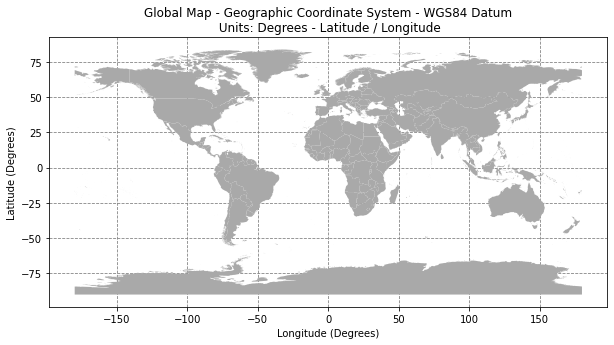

In [5]:
import matplotlib.pyplot as plt
# Plot data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
data.plot(color='darkgrey', 
                ax=ax)

# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

plt.show()

In [6]:
# Let's make a copy of our geodataframe
data_proj = data.copy()

robinson_crs = '+proj=robin'

# Reproject the geometries to the Robinson projected crs
data_proj = data_proj.to_crs(robinson_crs)
data_proj['geometry'].head()

0    MULTIPOLYGON (((11108970.260 445285.130, 11108...
1    MULTIPOLYGON (((11108970.260 445285.130, 11108...
2    MULTIPOLYGON (((-6477059.899 -1872360.838, -64...
3    POLYGON ((-6477059.899 -1872360.838, -6477072....
4    MULTIPOLYGON (((-6477059.899 -1872360.838, -64...
Name: geometry, dtype: geometry

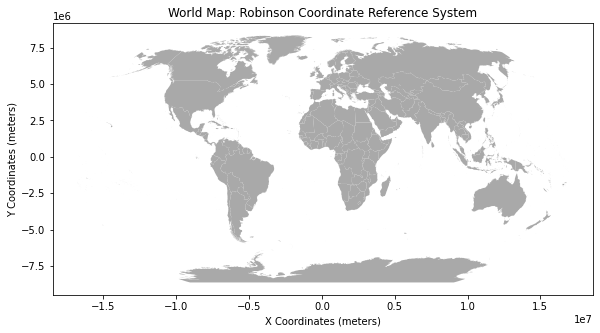

In [7]:
# Plot data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
data_proj.plot(color='darkgrey', 
                ax=ax)

# Set the x and y axis labels
ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

plt.show()

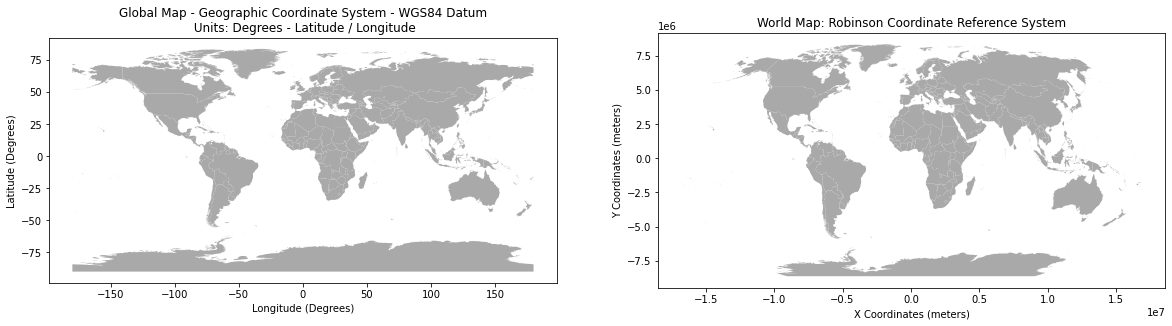

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  # 1 row, 2 columns

data.plot(color='darkgrey', 
                ax=ax1)

# Set the x and y axis labels
ax1.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

data_proj.plot(color='darkgrey', 
                ax=ax2)

# Set the x and y axis labels
ax2.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

# ax1.axis('off')
# ax2.axis('off')
#plt.tight_layout()
plt.show()

## Where to find urban spatial data

One important skill to develop in urban data science is finding urban spatial data. In this course, we will look into a range of data sources including easily accessible data such as OpenStreetMap, as well as non-trivial data sources such as within scientific articles.

Some important spatial data sources include:

* [OpenStreetMap](https://www.openstreetmap.org/#map=12/32.7623/-117.0428), an open source project supported by volunteers over the world. Despite occasional inaccuracies, it is a fantastic source of spatial data that can be used in almost any project located in urban environments. We will access it using `osmnx`, a Python package that allows interaction with the OpenStreetMap API to download data, analyse and visualise it.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/osm.PNG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

* [NASA Gridded population of the world](https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11), a raster dataset of global population density estimates with a granularity of up to a few hundred meter grid cells.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/NASA.PNG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* [Airbnb price listings](http://insideairbnb.com/get-the-data.html), the official data repository of Airbnb listings. A very useful data source for small student projects dealing with spatial data, as well as for studying the Airbnb market around the globe.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/Airbnb_data.PNG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* [New York City's Zoning and Land Use data](https://zola.planning.nyc.gov/data#9.72/40.6664/-73.7355), an good example of a high-quality municipal data source, part of the open data initiative among public authorities.


* Yerevan [GG](https://www.ggtaxi.com/signin) ride sharing data. Proprietary vehicle GPS data shared for educational and research purposes.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/gps.PNG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* [Scientific articles](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0162678#sec021) in journals that require sharing data 

* [Urban Atlas](https://www.eea.europa.eu/data-and-maps/data/copernicus-land-monitoring-service-urban-atlas), a reliable, inter-comparable, high-resolution land use dataset for over 300 Large Urban Zones and their surroundings.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/urban_atlas.JPG)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$


* [NYC taxi trip data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), a detailed and temporally fine data of New York city taxi cab trip origins and destination data.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$

![title](images/ny_taxi.JPG)

### Homework assignment

Play around with the code given in this class where we converted the World shapefile to a Robinson map projection, and convert the shapefile to any other geographic projection of your choice.

For submission of the assignments, you can simply save the resulting plots as a .JPG file, name it **< Name > < Surname > Project 1 Homework** and upload it to Moodle. Make sure to include the name of the projection you chose in the title of the plot!

Have fun!